#  Predicting Bank Loan Eligibility from Loan Status Prediction Dataset

## Introduction

When an individual requests a loan from an entity such as a government, corporation or bank, they must submit an application in which they request the amount they need to borrow. The entity can approve or deny the request, based on factors such as the individual’s financial history and character. While property loans can allow individuals to access opportunities such as buying land for a home, it can be difficult to get approved. Unlike other types of loans, property loans do not generally have collateral, which makes the loan more risky for the financial institution and therefore increases the complexity and selectivity of the loan application process. Consequently, people applying for a property loan may be required to submit a lot of documentation, such as their credit score, intentions for the land, or risks associated with the piece of land, including zoning or utilities (Danielsson, 2024). 

We intend to analyze the relationship between the applicant's financial circumstances, their requested loan amount, and the loan term in relation the loan status. This leads us to the question:
> Will a loan applicant have their loan approved or denied based on the applicant's income, co-applicant's income, loan amount (in thousands), loan amount term (in months)?

This dataset compllied [here](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data) by Bhavik Jikadara includes information on applicants who have applied for property loans in the past, indicating whether their requests were accepted by the bank. It consists of 12 chararcteristics related to the applicants, including categorical variables:

- **Loan_ID**: A unique loan ID.
- **Gender**: Either male or female.
- **Married**: Weather Married(yes) or Not Marttied(No).
- **Dependents**: Number of persons depending on the client.
- **Education**: Applicant Education(Graduate or Undergraduate).
- **Self_Employed**: Self-employed (Yes/No).
- **Credit_History**: Credit history meets guidelines.
- **Property_Area**: Applicants are living either Urban, Semi-Urban or Rural.

as well as quantitative variables:

- **ApplicantIncome**: Applicant income.
- **CoapplicantIncome**: Co-applicant income.
- **LoanAmount**: Loan amount in thousands.
- **Loan_Amount_Term**: Terms of the loan in months.

This dataset not only explains how loan approval decisions are made but also serves as a valuable resource for financial institutions to refine their lending criteria. Additionally, it provides analysis of different factors that may impact an individual's access to financial services. Our goal is to build a Classification Model to predict whether a loan will be approved or rejected for an applicant, enhancing decision-making accuracy and efficiency in the loan approval process.


## Data Visualization

The dataset is a .csv file with headers.  We’ll load it using `read_csv` function without additional argument.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(cowplot)
library(GGally)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# reading the data
url <- "loan_data.csv"
raw_loan_data <- read_csv(url)
#raw_loan_data <- read_csv("Group Project/loan_data.csv")
head(raw_loan_data)

Rows: 381 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Pro...
dbl (5): ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y


Table 1: First 6 rows of the raw loan dataset. From this table, we see the 12 categorical variables and the 4 quantitative variables. 

In [3]:
# convert Loan_Status into a factor 

raw_loan_data <- raw_loan_data |>
    mutate(Loan_Status = as_factor(Loan_Status))
glimpse(raw_loan_data)

# verify that it converted to a factor variable 
raw_loan_data |>
    distinct(Loan_Status)

Rows: 381
Columns: 13
$ Loan_ID           <chr> "LP001003", "LP001005", "LP001006", "LP001008", "LP0…
$ Gender            <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Mal…
$ Married           <chr> "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No"…
$ Dependents        <chr> "1", "0", "0", "0", "0", "2", "2", "0", "2", "0", "1…
$ Education         <chr> "Graduate", "Graduate", "Not Graduate", "Graduate", …
$ Self_Employed     <chr> "No", "Yes", "No", "No", "No", "No", NA, "No", "No",…
$ ApplicantIncome   <dbl> 4583, 3000, 2583, 6000, 2333, 3200, 2500, 1853, 1299…
$ CoapplicantIncome <dbl> 1508, 0, 2358, 0, 1516, 700, 1840, 2840, 1086, 0, 0,…
$ LoanAmount        <dbl> 128, 66, 120, 141, 95, 70, 109, 114, 17, 125, 100, 7…
$ Loan_Amount_Term  <dbl> 360, 360, 360, 360, 360, 360, 360, 360, 120, 360, 24…
$ Credit_History    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, NA, 0, 1, 1, 0, 0, 0, …
$ Property_Area     <chr> "Rural", "Urban", "Urban", "Urban", "Urban", "Urban"…
$ Loan_Status     

Loan_Status
<fct>
N
Y


Table 2: Columns of raw loan dataset. The table reveals that the raw data contains categorical variables that provide insights into the applicants' characteristics such as gender, marital status, dependents, education level, employment background, and property areas. These variables do not provide numerical insights into the applicants' financial positions in relation to their loan specifics. Therefore, we will not consider these variables in predicting loan status. 

In [4]:
# visualize the credit history from the raw data 
credit_history <- group_by (raw_loan_data, Credit_History) |>
count (Credit_History)

credit_history

Credit_History,n
<dbl>,<int>
0,57
1,294
NA,30


Table 3: Credit history counts. 

Moreover, the credit history which may be associated with the financial standings of the applicants in the dataset is represented solely by the values 0 and 1. Further information is necessary to interpret what these numbers indicate and their classification criteria. As such, we will exclude the credit history from our analysis in this project.

To ensure that our data is clean and relevant to our project's objectives, our analysis prioritizes variables that quantitatively and directly reflect the applicants' financial standings and requested loan details, which include:

- **ApplicantIncome**
- **CoapplicantIncome**
- **LoanAmount (in thousands)**
- **Loan_Amount_Term (in months)**

So, the next step is our analysis is to select the columns for the selected predictor variables and the class. 

In [5]:
loan_data <- raw_loan_data |>
select (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term,Loan_Status)

#### The Classification Model

In order to evaluate the performance of the K-nearest neighbor (KNN) algorithm in predicting loan status, we will split the dataset, 75% for training and 25% for testing. This split helps us make sure we have enough data to both train a good model and accurately test how well it predicts. To identify the optimal K value ranging from 1 to 15, we will use cross-validation with 5 folds on our training and testing data for the final model.


In [6]:
# splitting between training and testing sets 
set.seed(1234)

loan_split <- initial_split(loan_data, prop = 0.75, strata = Loan_Status) 
loan_training <- training(loan_split) 
loan_testing <- testing(loan_split) 

##### Missing Values in Dataset
We noticed some rows missing values in the 'Loan_Amount_Term' column. Instead of dropping these rows and missing out on important data, we will fill them by mean imputation. This method ensures we retain as much data as possible, enhancing the effectiveness of our model's training process.

In [7]:
loan_missing_data <- colSums(is.na(loan_training))

loan_missing_data

ApplicantIncome CoapplicantIncome        LoanAmount  Loan_Amount_Term 
                0                 0                 0                 7 
      Loan_Status 
                0

To address missing values in the 'Loan_Amount_Term' column by performing mean imputation, we will add the `step_impute_mean step` to the `tidymodels` preprocessing recipe.

##### Class Imbalance Problem

In our preliminary explortory data analysis, we observed that the number of approved loan applications is much greater than that of the unapproved ones. This imbalance might cause the classifier to be biased towards predicting approvals. To address this issue, we will amplify the influence of the less frequent observations through oversampling unapproved cases within in our recipe. This will effectively balance the dataset to ensure a fair prediction outcome from the classifier.

In [8]:
# exploratory data analysis (table) on the training data

# distribution of approved and unapproved loan status
# determine if the data need to be balanced.

num_obs <- nrow (loan_training)
loan_counts <- loan_training |>
    group_by(Loan_Status) |>
    summarise(count  = n(),
              percentage = n()/num_obs *100) 

loan_counts

Loan_Status,count,percentage
<fct>,<int>,<dbl>
N,82,28.77193
Y,203,71.22807


Table 4: Counts of No and Yes in training dataset. As the number of approved loan status (Y) is approximately 2.5 times greater than the unapproved one (N). To balance the training data, we will add an oversampling step to the recipe with the `step_upsample` function from the `themis` R package. 

##### Centering and scaling

The next step in our data analysis is to visualize the distributions of the 4 variables. This is done using histograms for each predictor variable. 

Warning message:
“Removed 7 rows containing non-finite outside the scale range (`stat_bin()`).”


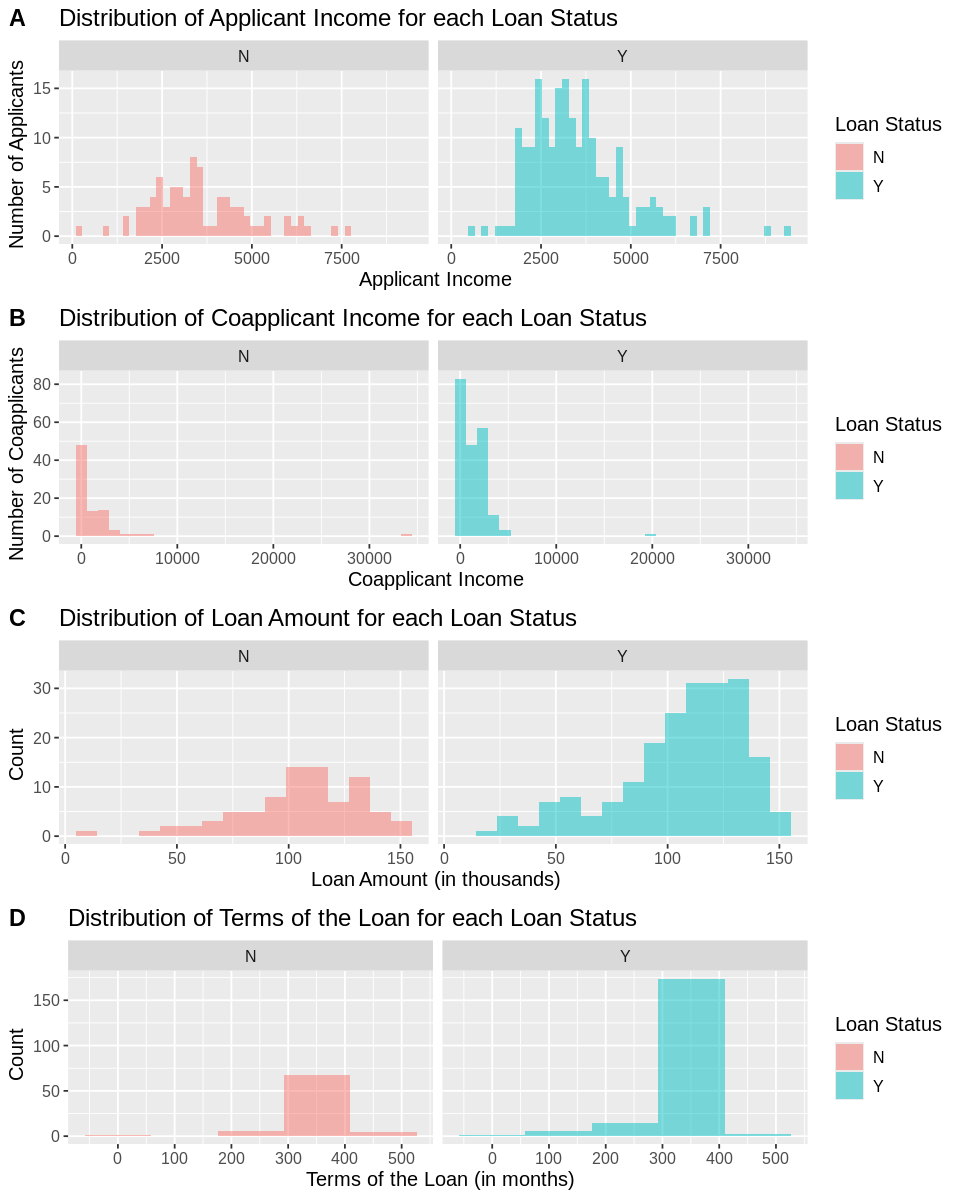

In [9]:
 options(repr.plot.width = 8, repr.plot.height = 10)

applicant_income_distribution <- loan_training |>
    ggplot(aes(x = ApplicantIncome, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins= 50)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Applicant Income",
           y = " Number of Applicants",
          title = "Distribution of Applicant Income for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

coapplicant_income_distribution <- loan_training |>
    ggplot(aes(x = CoapplicantIncome, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins=30)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Coapplicant Income",
           y = " Number of Coapplicants",
          title = "Distribution of Coapplicant Income for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

loan_amount_distribution <- loan_training |>
    ggplot(aes(x = LoanAmount, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins = 16)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Loan Amount (in thousands)",
           y = " Count",
          title = "Distribution of Loan Amount for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

loan_amount_term_distribution <- loan_training |>
    ggplot(aes(x = Loan_Amount_Term, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins= 5)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Terms of the Loan (in months)",
           y = " Count",
          title = "Distribution of Terms of the Loan for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

loan_distributions <- plot_grid (applicant_income_distribution,coapplicant_income_distribution,
                                 loan_amount_distribution,loan_amount_term_distribution, 
                                 ncol=1,
                                 labels = c("A", "B","C", "D"))
loan_distributions


Fig 1. Histograms showing distributions of the 4 variables used in this analysis. (insert interpretations for A-D here) 

The first step in our classification model is making a recipe. We scale and center each of the predictors so that each one contributes the same amount to the distance calculations used by k-nearest neighbours classification. As discussed earlier, we impute the means to account for missing values and upsample Loan_Status to account for class imbalance. 

In [10]:
install.packages("themis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [11]:
set.seed(1234) 

library(themis)

# creating a recipe

loan_recipe <- recipe(Loan_Status ~ ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term,
                      data = loan_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors()) |>
                step_impute_mean(all_predictors()) |>
                step_upsample(Loan_Status, over_ratio = 1, skip = TRUE)|>
                prep()


Next, we perform cross-validation on the training set and create a tibble of possible values for k. We selected 5 folds so that we can evaluate the accuracy of 5 different models and determine the best way to analyze our data set. We tested K values from 1 to 15 to get a better idea of which K values would give the most accurate predictions.

In [12]:
loan_vfold <- vfold_cv(loan_training, v = 5, strata = Loan_Status) 

loan_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 3)) 

Now, we can create a model using the nearest_neighbor function, with the engine set to kknn and the mode set to classification, in order to use a K-NN algorithm. The number of neighbors is set to tune so that we can test the different K values selected in the previous step.

In [13]:
loan_tuning_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification") 

With a model, a recipe, and a tibble of possible K values, we can now perform 5-fold cross-validation by creating a model, adding the recipe and the model, and tuning the grid with the vfold and grid created earlier. The collected metrics are filtered for accuracy and assigned to accuracies, which is then used to create a plot of K-values vs accuracy estimates.

In [14]:
 loan_metrics <- workflow() |>
    add_recipe(loan_recipe) |>
    add_model(loan_tuning_spec) |>
    tune_grid(resamples = loan_vfold, grid = loan_vals) |>
    collect_metrics() 

accuracies <- loan_metrics |>
        filter(.metric == "accuracy") 

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6350618,5,0.01267074,Preprocessor1_Model1
4,accuracy,binary,0.5963897,5,0.01858496,Preprocessor1_Model2
7,accuracy,binary,0.5965172,5,0.01800556,Preprocessor1_Model3
10,accuracy,binary,0.5681315,5,0.02040454,Preprocessor1_Model4
13,accuracy,binary,0.5824713,5,0.02647309,Preprocessor1_Model5


Table 5: Estimated accuracies of K values from 1 to 15 using 5-fold cross-validation.The best number of neighors can be decided by plotting the accuracy versus K, as shown below.

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

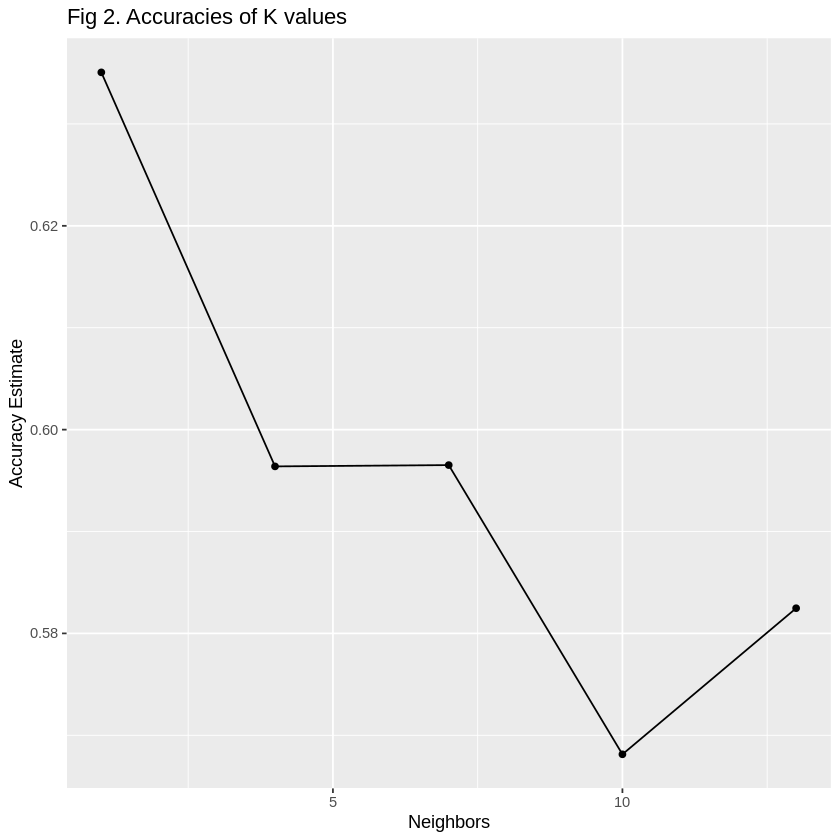

In [15]:
options(repr.plot.height = 7, repr.plot.width = 7) 

cross_val_plot <- accuracies |>
        ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate") +
        ggtitle("Fig 2. Accuracies of K values") 
        theme(text = element_text(size = 12)) 
cross_val_plot 

Fig 2: Plot of K values vs estimated accuracies. Based on this plot, we can see that K = 1 is the best value for this classification problem, as it gives the highest accuracy estmate. So, moving forward in our analysis, we will use 1 neighbour. 

We can check that this is the best K value in a more programmatical way without relying on interpretation of the plot by arranging and pulling from the accuracies data frame. It is useful to visualize and find the exact K value to see both how the accuracy varies as K changes and to be certain that we are classifying under the optimal K value.

In [22]:
best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors) 
best_k

[1] 1

This indicates that K = 1 is the optimal K value, achieving the highest mean accuracy at 63.5% compared to other K values ranging from 1 to 15.

In [69]:
# bake the loan_training with loan_recipe to inspect the result of the preprocessing steps

baked_loan_training <- bake(loan_recipe, loan_training)

total_rows <- nrow(baked_loan_training)
 
# Identify and count duplicate elements in each variable
duplicated_applicant_income <- select( baked_loan_training, ApplicantIncome) |>
duplicated()|>
sum()

duplicated_coapplicant_income <- select (baked_loan_training, CoapplicantIncome) |>
duplicated()|>
sum()

duplicated_loan_amount <- select (baked_loan_training, LoanAmount) |>
duplicated()|>
sum()

duplicated_loan_amount_term <- select (baked_loan_training, Loan_Amount_Term) |>
duplicated()|>
sum()

#count and calculate the percentage of duplicated values compared to the total row

duplicated <- c("duplicated_applicant_income ", 
                "duplicated_coapplicant_income ", 
                "duplicated_loan_amount", 
                "duplicated_loan_amount_term")
count <- c(duplicated_applicant_income, 
         duplicated_coapplicant_income, 
         duplicated_loan_amount, 
         duplicated_loan_amount_term)

duplicated_df <- data.frame(duplicated, count)|>
mutate ( percentage = count/total_rows*100)

duplicated_df

duplicated,count,percentage
<chr>,<int>,<dbl>
duplicated_applicant_income,34,11.92982
duplicated_coapplicant_income,142,49.82456
duplicated_loan_amount,193,67.71930
duplicated_loan_amount_term,274,96.14035


Table 6: Count and percentage of duplicates in each selected predictor.The high percentage of duplicates in the training data used for the classification model could explain why the optimal K value is 1. This issue might stem from the upsampling and mean imputation process included in the data preprocessing steps of the recipe.

To investigate whether the selection of predictors affects the low estimated accuracy for the optimal k value, we will use code described in the chapter on iteration from "R for Data Science" by Wickham and Grolemund (2023), which can sequentially evaluates the impact of each of the four predictors on Loan_Status. This analysis will focus on the individual contribution of each predictor to the model’s accuracy, allowing us to assess their effectiveness and influence on the overall performance.

In [37]:
#names of predictors
names <- colnames(loan_training |> select(-Loan_Status))

# create an empty tibble to store the results
loan_accuracies <- tibble(size = integer(),
                     model_string = character(),
                     accuracy = numeric())


# create a 5-fold cross-validation object
#baked_vfold <- vfold_cv(baked_loan_training, v = 5, strata = Loan_Status)


# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Loan_Status", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        loan_recipe_2 <- recipe(as.formula(model_string),
                                data = loan_training) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())|>
                          step_impute_mean(all_predictors()) |>
                          step_upsample(Loan_Status, over_ratio = 1, skip = TRUE)

        # tune the K-NN classifier with these predictors,
        # and collect the accuracy for K = 1
        acc <- workflow() |>
          add_recipe(loan_recipe_2) |>
          add_model(loan_tuning_spec) |>
          tune_grid(resamples = loan_vfold, grid = 1) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

         # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    loan_accuracies <- loan_accuracies |>
      add_row(size = i,
              model_string = models[[jstar]],
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
loan_accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Loan_Status ~ CoapplicantIncome,0.5022448
2,Loan_Status ~ CoapplicantIncome+ApplicantIncome,0.5684340
3,Loan_Status ~ CoapplicantIncome+ApplicantIncome+Loan_Amount_Term,0.6274198
4,Loan_Status ~ CoapplicantIncome+ApplicantIncome+Loan_Amount_Term+LoanAmount,0.5932504


Table 7: Estimated accuracies by sequentially adding predictors for the sequence of models built using training data.

Table 7 shows that accuracy improves when predictors are added sequentially, starting with CoapplicantIncome, followed by ApplicantIncome, and then Loan_Amount_Term. This pattern suggests that these three predictors are likely more relevant to Loan_Status. However, the accuracy decreases when the fourth predictor, LoanAmount, is added to the model, indicating that LoanAmount is less relevant compared to the other selected predictors. Generally, the accuracy range remains low, suggesting that these predictors alone are insufficient for achieving high accuracy and more relevant variables are needed to enhance the classification model for Loan_Status.

Next, we create a new model using K = 1 and pass it to the workflow function along with the recipe created earlier. We then run the workflow on the training dataset using the fit function. 

In [72]:
loan_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
    set_engine("kknn") |>
    set_mode("classification") 

loan_fit <- workflow() |>
    add_recipe(loan_recipe) |>
    add_model(loan_spec) |>
    fit(data = loan_training) 


Now that we have created our K-NN algorithm, we can evaluate it on the test set. This is done by predicting on the test set using predict.

In [73]:
loan_predictions <- predict(loan_fit, loan_testing) |>
    bind_cols(loan_testing) 

We can then collect various metrics about the performance of our model. The first is a confusion matrix, which shows a summary of the predictions of the model in the form of a matrix. 

In [74]:
loan_conf_mat <- loan_predictions |>
   conf_mat(truth = Loan_Status, estimate = .pred_class) 
loan_conf_mat 

          Truth
Prediction  N  Y
         N  9 19
         Y 19 49

Table 6: Confusion matrix for K-NN algorithm. From this matrix, we can see that there are far more positives (Yes) than negatives (No), as determined earlier when discussing the class imbalance. We can also see that the algorithm predicted Yes more often than No. Additionally, there was the same number of false positives and false negatives. 

The next metrics we can calculate are precision and recall. 

In [78]:
loan_precision <- loan_predictions |>
    precision(truth = Loan_Status, estimate = .pred_class, event_level="first") |>
    select(-.estimator)

loan_precision 

.metric,.estimate
<chr>,<dbl>
precision,0.3214286


Table 8: Precision of K-NN algorithm. 

In [79]:
loan_recall <- loan_predictions |>
  recall(truth = Loan_Status, estimate = .pred_class, event_level = "first")

loan_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.3214286


Table 9: recall of K-NN algorithm. 

Both precision and recall are relatively low. Precision assesses the proportion of positive predictions (Y) that were actually correct. A low precision rate implies that when the classifier identifies a result as positive, there is a lower likelihood that this result is indeed positive. Recall quantifies how many of the actual positive observations in the test set were correctly identified as positive by the classifier. Low recall indicates that if a positive observation exists in the test data, the classifier is not likely to detect it.

## Methods 

**Selecting Predictors**

The selected columns from the dataset include numberical variables that describe the loan and the applicant's income, specifically:

- ApplicantIncome
- CoapplicantIncome
- LoanAmount (in thousands)
- Loan_Amount_Term (in months)

**Creating a Recipe**

We will need to create a recipe to be incorporated into the classification model using the K-nearest neighbors algorithm.Given the differences in range, means, and units among these predictors, it's necessary to scale and center them to ensure they each contribute the same weight to the model. To address the missing entries, we will include mean imputation as a step in the recipe.


**Tuning the Model**

We will use the training data to evaluate the classifer by comparing different K values. This involves conducting cross-validation to determine the accuracy of each K value and selecting the one that givess the highest accuracy.

**Evaluating on the Test Set**

we can build the workflow by adding the recipe and the K-NN classifer with the chosen K value to evaluate the quality of its prediction on the testing data.This can be obtained by calculating the prediction accuracy and examining the confusion matrix which provides details precision and recall of the classifer.

## Expected outcomes and significance

#### What do you expect to find?

Our final goal would be to find whether or not an applicant would get a loan using the different predictors in our analysis. To reach this goal, we will deduce the relationship between the our variables and the likelihood of an applicant getting a loan. In particular, we hope to see a pattern that shows a positive relationship between applicant income, co-applicant income, loan amount, the term of a loan, and the probability of an applicant getting their loan approved by a bank. 

#### What impact could such findings have?

These findings would make it easier for banks to decide which of the applicants should get a loan, based on the predictors we use in our classification problem. It allows for a more time and cost-effective solution to make decisions and prioritse those applicants who meet a certain criteria. Along with this, applicants who are aware of these criterion can base their decision making on it. For instance, applicants who are aware that banks priorise people who have higher incomes may decide to apply for a loan only after they have higher incomes. 

#### What future questions could this lead to?

Our analysis could lead to mechanistic questions about the underlying mechanism behind whether or not someone receives a loan. One could also pose an inferential question based on the preliminary exploratory data about how the variables in this data set can be applied to the wider population. Regression questions may also be formed through this analysis, wherein a quantitative value, such as a co-applicant's income, could be predicted using the applicant's income and other predictors. On a larger scale, different classifications can be made for different banks, and differences in loan approval criterion can be calculated. This would allow for applicants to make informed decisions on what bank would be the best fit for them to get their loan approved. 

## Bibliography

J. Bhavik, Loan Status Prediction (2024), https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data

M. Danielsson, Land Loans: Everything You Need to Know (2024), https://www.investopedia.com/articles/credit-loans-mortgages/090716/land-loans-3-things-know-you-buy-land.asp#:~:text=You%20can%20take%20out%20a,you%20intend%20to%20use%20it 

W. Hadley, and G. Grolemund, R for Data Science: Import, Tidy, Transform, Visualize, and Model Data (2023), http://r4ds.hadley.nz/